In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

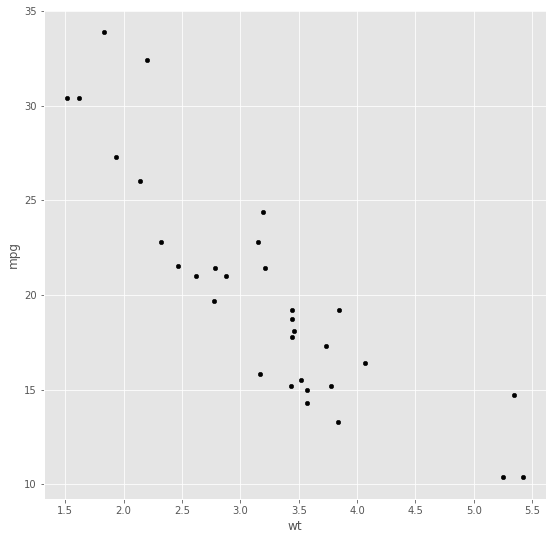

In [ ]:
#Загрузка данных
mtcars= pd.read_csv("mtcars.csv")
#Сделаем скаттер и посмотрим, как распределены наши данные
#Нас интересует соотношение веса автомобиля и расхода топлива
mtcars.plot(kind="scatter",
            x="wt", #Это вес
            y="mpg", #Это - показатель, сколько авто может проехать миль на одном галлоне (т.е. топливная эффективность)
            figsize=(9,9),
            color="black")

In [ ]:
from sklearn import linear_model

In [ ]:
#Инициализируем модель
regression_model = linear_model.LinearRegression()

#Обучаем модель
regression_model.fit(X = pd.DataFrame(mtcars["wt"]),
                     y = mtcars["mpg"])

#Проверяем значение пересечения
print(regression_model.intercept_)

#Коэффициенты
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


In [ ]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]),
                     y = mtcars["mpg"])

0.7528327936582646

In [ ]:
#Получили R-squared. Мы получили 0.75. Смысл r-squared в том, что оно говорит нам:
#75% вариативности в расходе топлива может быть объяснено именно весом машины, который мы анализируем.

In [ ]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

#Actial - prediction = residuals
residuals = mtcars["mpg"] - train_prediction
residuals.describe()

count    3.200000e+01
mean    -8.215650e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

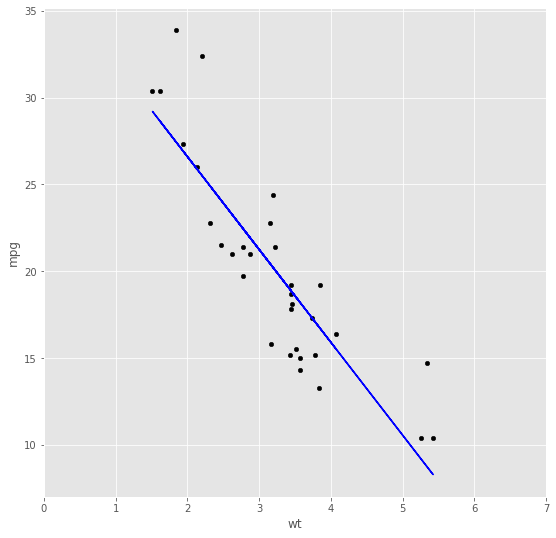

In [ ]:
mtcars.plot(kind="scatter",
            x="wt",
            y="mpg",
            figsize=(9,9),
            color="black",
            xlim = (0,7))

#Визуализируем регрессию
plt.plot(mtcars["wt"], #Переменная, которой мы пытаемся объяснить расход топлива (т.е. вес)
         train_prediction, #Предсказываемые величины расхода
         color="blue")

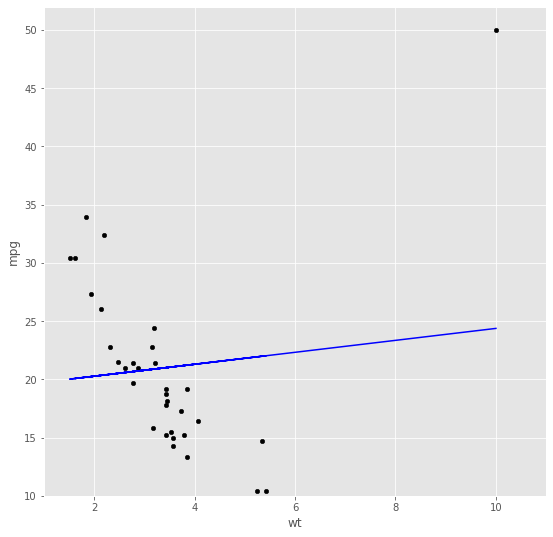

In [ ]:
#Получилось неплохо, но что если в наших данных появляется значение, которое серьёзно расходится с остальными?
#Например, добавим какой-нибудь необычный тяжёлый, но эффективный в плане расхода топлива авто
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# После чего снова инициируем модель
regression_model = linear_model.LinearRegression()

# Обучаем
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Готовим визуализацию
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Визуализируем
plt.plot(new_cars["wt"],     
         train_prediction2,  
         color="blue");

In [ ]:
#Результат - ну не очень
#То есть, для того, чтобы получить нормальную линейную регрессию, нам необходимо, чтобы данные были нормально распределены (хотя бы примерно)
#Чтобы это понять, используют Q-Q plot - он же "график квантиль-квантиль"

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.0327797489458974, -7.963120739283

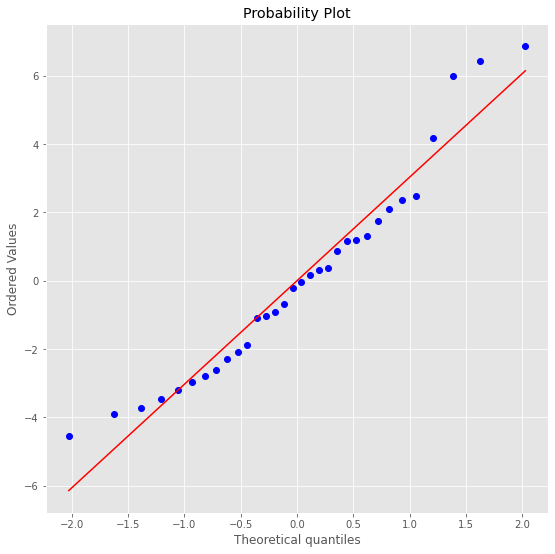

In [ ]:
 #Сделать Q-Q график можно так:
 plt.figure(figsize=(9,9))
 stats.probplot(residuals, dist="norm", plot=plt)

In [ ]:
#Видим, что остаточные величины распределены достаточно близко к линии, значит, использование линейной регрессии имеет смысл

In [ ]:
#Среднеквадратичная ошибка - главный способ измерения точности модели линейной регресии.
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5
RMSE

2.949162685955028

In [ ]:
#Но если мы имеем нелинейную зависимость, то один из вариантов другой регрессии - это полиномиальная или параболлическая регрессия

Полиномиальная регрессия

In [ ]:
# Инициализация модель
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           # Вес
                           mtcars["wt"]**2]).T     # Добавим вес в квадрате, чтобы создать нелинейность

# Обучаем модель
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Выведим пересесение по оси y
print("Model intercept")
print(poly_model.intercept_)

# Проверяем коэффициенты
print("Model Coefficients")
print(poly_model.coef_)

# R-squared
print("Model Accuracy (R-squared):")
print(poly_model.score(X = predictors, 
                 y = mtcars["mpg"]))

Model intercept
49.93081094945181
Model Coefficients
[-13.38033708   1.17108689]
Model Accuracy (R-squared):
0.8190613581384095


In [ ]:
#Мы видим, что R-squared намного выше, значит модель лучше объясняет неравномерность распределения данных

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


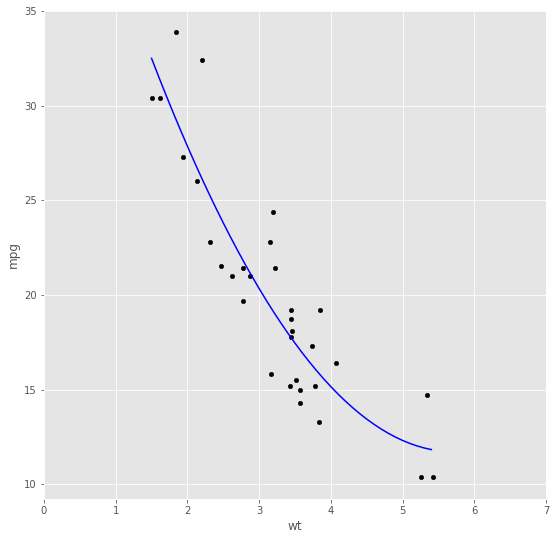

In [ ]:
import numpy as np
# Визуализируем кривую в диапазоне 1.5 - 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Записываем прогнозные величины
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Получаем значения по оси абсцисс
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Визуализируем
plt.plot(poly_line_range,   
         y_values,          
         color="blue");

In [ ]:
preds = poly_model.predict(X=predictors)

mean_squared_error(preds , mtcars["mpg"])**0.5

2.523300472461079

In [ ]:
# Теперь добавим ещё больше переменных и усложним логику

poly_model = linear_model.LinearRegression()


predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     


poly_model.fit(X = predictors, 
               y = mtcars["mpg"])


print("Model intercept")
print(poly_model.intercept_)


print("Model Coefficients")
print(poly_model.coef_)


poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
-14921.120533981546
Model Coefficients
[ 6.45813566e+04 -1.20086131e+05  1.26931928e+05 -8.46598453e+04
  3.73155198e+04 -1.10334755e+04  2.16590404e+03 -2.70730544e+02
  1.94974162e+01 -6.15515436e-01]


0.870210657838439

In [ ]:
# Получили какие-то дикие коэффициенты, но высокую R-squared, что может давать нам основания предположить, что наша модель точна. 
# Но это необязательно так

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


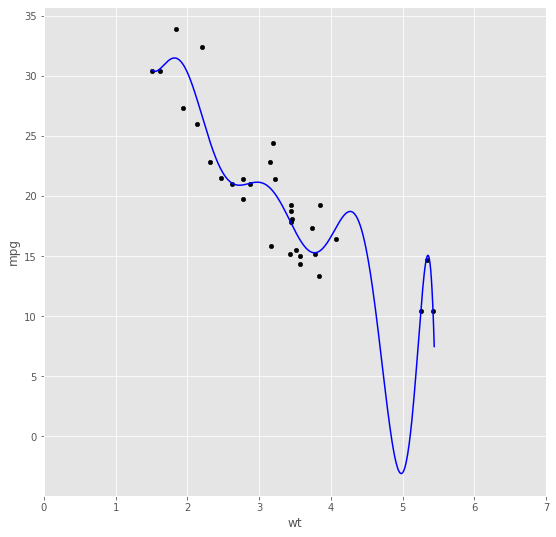

In [ ]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  


y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))


plt.plot(p_range,   
         y_values,          
         color="blue");

In [ ]:
# Мы видим, что модель пытается соответствовать значениям, но там где wt=5 мы видим огромную "яму", которая никак не связана с данными
# Она нужна лишь за тем, чтобы модель точно соответстовала трём последним точкам, и это не очень хорошо, 
# поскольку в данном отрезке линия модели не связана с данными
# И в итоге, модель говорит нам что машина с весом 5 тонн расходует топлива меньше, чем 0 литров. 
# Это иллюстрация overfitting - То есть, мы намудрили и модель оказалась слишком сложной
# Вывод - надо избегать того, чтобы модель слишком хорошо соответствовала тестовым данным, поскольку тогда повышается риск, 
# что она нафейлит с новыми реальными данными